In [1]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D.BoundaryShape import *
from PDE2D.Solver import *
from PDE2D.Coefficient import *
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from PDE2D import PATH

In [2]:
from PDE2D.utils import *
matplotlib.rcParams.update(MPL_STYLE)
cmap = "Reds"
frame_color = "white"
column_width = COLUMN_WIDTH

In [3]:
scale = 30
bias = 1
u = 2
image1 =                             np.array ([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype = np.float64)

image2 =                             np.array ([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                [ 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype = np.float64)

image1 *= scale
image1 += bias
image1 = np.repeat(np.repeat(image1, u, axis = 0), u, axis = 1)

image2 *= scale
image2 += bias
image2 = np.repeat(np.repeat(image2, u, axis = 0), u, axis = 1)
colors = ["black", "darkorange"]

In [4]:
dirichlet, neumann = load_boundary_data(only_dirichlet=True)
diffusion1 = TextureCoefficient("diffusion", [[-1,-1], [1,1]], image1)
diffusion2 = TextureCoefficient("diffusion", [[-1,-1], [1,1]], image2)
#shape = CircleShape(radius = 0.96, dirichlet = dirichlet, neumann = neumann)

shape =load_bunny(all_dirichlet=True, dirichlet = dirichlet, neumann = neumann)
data_holder1 = DataHolder(shape = shape, α = diffusion1)
data_holder2 = DataHolder(shape = shape, α = diffusion2)
data_holder1.create_accelaration()
data_holder2.create_accelaration()

GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


'/home/ekrem/repos/MC-PDE3D/figures/diff_majorant/diff_majorant.pdf'

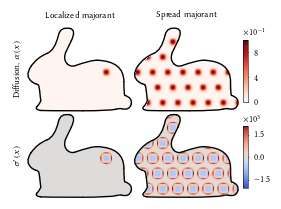

In [5]:
#bbox = [[-1,-1],[1,1]]
bbox = [[-0.85, -0.63],[0.9, 0.8]]
x = bbox[1][0] - bbox[0][0]
y = bbox[1][1] - bbox[0][1]
res = 2048
resolution = [int(res * y), int(res * x)]
spp = 1
lw = 1
points = create_image_points(bbox, resolution, spp=1, centered = True)
mask = shape.inside_closed_surface_mask(points)
diff_vals1 = dr.select(mask, diffusion1.get_value(points), dr.nan)
diff_vals2 = dr.select(mask, diffusion2.get_value(points), dr.nan)
# Calculate the textures
α_vals1 = data_holder1.α.get_value(points)
grad_α1, laplacian_α1 = data_holder1.α.get_grad_laplacian(points)
σ_vals1 = data_holder1.σ.get_value(points)
α_vals2 = data_holder2.α.get_value(points)
grad_α2, laplacian_α2 = data_holder2.α.get_grad_laplacian(points)
σ_vals2 = data_holder2.σ.get_value(points)
# Equation 21 (2nd paper)
σ_new1 = data_holder1.σ_(σ_vals1, α_vals1, grad_α1, laplacian_α1)
σ_new2 = data_holder2.σ_(σ_vals2, α_vals2, grad_α2, laplacian_α2)
max_range =max(dr.max(σ_new1)[0], dr.min(σ_new1)[0])

majorant_vals1 = dr.select(mask, σ_new1, dr.nan)
diff_image1 = create_image_from_result(diff_vals1, resolution)[0][0]

majorant_vals2 = dr.select(mask, σ_new2, dr.nan)
diff_image2 = create_image_from_result(diff_vals2, resolution)[0][0]

majorant_image1 = create_image_from_result(majorant_vals1, resolution)[0][0]
majorant_image2 = create_image_from_result(majorant_vals2, resolution)[0][0]
#global_majorant = dr.max(σ_new)[0] - dr.min(σ_new)[0]
o1 = 60 
o2 = 60
global_majorant = dr.max(dr.abs(σ_new1))[0]
imsize = 220
imsize_h = int(imsize * x)
imsize_v = int(imsize * y)
pre_offset = 10
offset = 20
past_offset = 85
cbar_begin = 50
cbar_end = 40
total_offset = pre_offset + offset + past_offset
scale = column_width /  (2 * imsize_h + total_offset + o2)
fig = plt.figure(figsize = ((2 * imsize_h + total_offset + o2) * scale, (2 * imsize_v + o1) * scale))
g = gridspec.GridSpec(2 * imsize_v + o1, 2 * imsize_h + total_offset + o2)
ax = fig.add_subplot(g[:,:])
plt.setp(ax.spines.values(), color=frame_color)
disable_ticks(ax)

ax_diff1 = fig.add_subplot(g[     o1 : o1 + imsize_v,                    o2: o2 + imsize_h])
ax_diff2 = fig.add_subplot(g[     o1 : o1 + imsize_v,                    o2 + imsize_h: o2 + 2 * imsize_h])
ax_majorant1 = fig.add_subplot(g[ o1 + imsize_v : o1 + 2 * imsize_v,     o2 : o2 + imsize_h])
ax_majorant2 = fig.add_subplot(g[ o1 + imsize_v : o1 + 2 * imsize_v,     o2 + imsize_h: o2 + 2 * imsize_h])
ax_cbar_diff = fig.add_subplot(g[o1 + cbar_begin : o1 + imsize_v - cbar_end, o2 + 2 * imsize_h + pre_offset : o2 + 2 * imsize_h + pre_offset + offset])
ax_cbar_majorant = fig.add_subplot(g[o1 + imsize_v + cbar_begin : o1 + 2 * imsize_v - cbar_end, o2 + 2 * imsize_h + pre_offset : o2 + 2 * imsize_h + pre_offset + offset])

plot_image(diff_image1, ax_diff1, cmap = cmap, colorbar = False)
plot_image(diff_image2, ax_diff2, cmap = cmap, colorbar = False)
plot_image(majorant_image1, ax_majorant1, cmap = "coolwarm", input_range = [-max_range, max_range], colorbar = False)
plot_image(majorant_image2, ax_majorant2, cmap = "coolwarm", input_range = [-max_range, max_range], colorbar = False)


shape.sketch(ax_diff1, bbox, resolution, lw =lw, colors = colors)
shape.sketch(ax_diff2, bbox, resolution, lw =lw, colors = colors)
shape.sketch(ax_majorant1, bbox, resolution, lw =lw, colors = colors)
shape.sketch(ax_majorant2, bbox, resolution, lw =lw, colors = colors)
disable_border(ax_diff1)
disable_border(ax_diff2)
disable_border(ax_majorant1)
disable_border(ax_majorant2)
norm_diff = mcolors.Normalize(vmin= 0, vmax=bias + scale)
cbar_diff = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm_diff, cmap=cmap), cax=ax_cbar_diff, orientation='vertical')

num_ticks = 3
tick_locator = ticker.MaxNLocator(nbins=num_ticks)
cbar_diff.locator = tick_locator
cbar_diff.formatter.set_powerlimits((0, 0))
cbar_diff.ax.yaxis.set_offset_position('left') 
cbar_diff.update_ticks()

norm_majorant = mcolors.Normalize(vmin= -max_range, vmax= max_range)
cbar_majorant = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm_majorant, cmap="coolwarm"), cax=ax_cbar_majorant, orientation='vertical')
tick_locator = ticker.MaxNLocator(nbins=num_ticks)
cbar_majorant.locator = tick_locator
cbar_majorant.formatter.set_powerlimits((0, 0))
cbar_majorant.ax.yaxis.set_offset_position('left') 
cbar_majorant.update_ticks()
ax_diff1.set_ylabel(r"Diffusion, $\alpha(x)$")
ax_majorant1.set_ylabel(r"$\sigma'(x)$")
ax_diff1.set_title("Localized majorant", fontsize = DEFAULT_FONTSIZE_SMALL)
ax_diff2.set_title("Spread majorant", fontsize = DEFAULT_FONTSIZE_SMALL)
plt.margins(x = 0, y = 0)
save_fig("diff_majorant", os.path.join(PATH, "figures"))
#plt.savefig("diff_majorant.pdf", bbox_inches='tight', pad_inches=0.005, dpi=300)

In [6]:
point1 =Point2f([+0.2, -0.2])
bi1 = shape.boundary_interaction(point1)
r1, sigma1,z1 = data_holder1.get_Rσz(point1, bi1.r)
r_first1 = Float(bi1.r)
point_s1 = point2sketch(point1, bbox, resolution).numpy()
r_s_first_x1, r_s_first_y1, r_s_first1  = dist2sketch(r_first1, bbox, resolution)
r_s_x1, r_s_y1, r_s1 = dist2sketch(r1, bbox, resolution)


In [7]:
point2 =Point2f([+0.44, -0.13])
bi2 = shape.boundary_interaction(point2)
r2, sigma2,z2 = data_holder1.get_Rσz(point2, bi2.r)
r_first2 = Float(bi2.r)
point_s2 = point2sketch(point2, bbox, resolution).numpy()
r_s_first_x2, r_s_first_y2, r_s_first2  = dist2sketch(r_first2, bbox, resolution)
r_s_x2, r_s_y2, r_s2 = dist2sketch(r2, bbox, resolution)



In [8]:
point3 =Point2f([+0.44, -0.02])
bi3 = shape.boundary_interaction(point3)
r3, sigma3, z3 = data_holder1.get_Rσz(point3, bi3.r)
r_first3 = Float(bi3.r)
point_s3 = point2sketch(point3, bbox, resolution).numpy()
r_s_first_x3, r_s_first_y3, r_s_first3  = dist2sketch(r_first3, bbox, resolution)
r_s_x3, r_s_y3, r_s3 = dist2sketch(r3, bbox, resolution)

GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.


'/home/ekrem/repos/MC-PDE3D/figures/radius_decrease/radius_decrease.pdf'

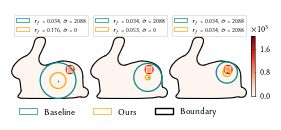

In [9]:
color1 = "darkcyan"
color2 = "orange"
color3 = "green"
b_size = 170
o1_1 = 20
o1_2 = 120
o1 = o1_1 + o1_2
o2 = 5
bb = 0
image_size = 320
image_size_h = int(image_size * x) 
image_size_v = int(image_size * y)
pre_cbar = 20
cbar_size = 30
past_cbar = 120
label_size = 10
c2 = 50
lx = (image_size_v + label_size + b_size + o1)
ly = (3 * image_size_h + cbar_size + o2 + past_cbar + pre_cbar)
scale = column_width / ly
fig = plt.figure(figsize = (ly * scale, lx* scale))
 
g = gridspec.GridSpec(lx, ly, figure = fig, wspace = 0, hspace=0)
ax = fig.add_subplot(g[:,:])
plt.setp(ax.spines.values(), color=frame_color)
disable_ticks(ax)
ax1 = fig.add_subplot(g[o1_1 + b_size:o1_1 +image_size_v + b_size, o2: o2 + image_size_h])
ax2 = fig.add_subplot(g[o1_1 +b_size:o1_1 +image_size_v + b_size, o2 + image_size_h : o2 +2 * image_size_h])
ax3 = fig.add_subplot(g[o1_1 +b_size:o1_1 +image_size_v + b_size,o2 +  2 * image_size_h : o2 +3 * image_size_h])
ax4 = fig.add_subplot(g[o1_1 +b_size : lx + o1_1 -label_size - o1_2 - c2, pre_cbar + o2 + 3 * image_size_h: pre_cbar + o2 + 3 * image_size_h + cbar_size])
ax5 = fig.add_subplot(g[o1_1 +image_size_v + b_size : o1_1 +image_size_v + label_size + b_size, o2 : ly + o2 -cbar_size])

ax1_b = fig.add_subplot(g[o1_1: o1_1 +b_size, o2 + bb : o2 + image_size_h + bb])
ax2_b = fig.add_subplot(g[o1_1:o1_1 + b_size, o2 + image_size_h + bb : o2 + 2 * image_size_h + bb])
ax3_b = fig.add_subplot(g[o1_1: o1_1 + b_size, o2 + 2 * image_size_h + bb : o2 + 3 * image_size_h + bb])
disable_border(ax5)
disable_ticks(ax5)
disable_border(ax1)
disable_ticks(ax1)
disable_border(ax2)
disable_ticks(ax2)
disable_border(ax3)
disable_ticks(ax3)
disable_border(ax1_b)
disable_ticks(ax1_b)
disable_border(ax2_b)
disable_ticks(ax2_b)
disable_border(ax3_b)
disable_ticks(ax3_b)
c = 1
p = 0.3
lw = 0.8
lw_sphere = 0.9

majorant = r"$\bar{\sigma}$"

majorant_image = np.abs(majorant_image1)

plot_image(majorant_image, ax1, colorbar = False, cmap = cmap)
shape.sketch(ax1, bbox, resolution, lw = lw, colors = colors)

star_first1 = patches.Arc(point_s1,  2 * c *r_s_first_x1[0], 2 * c * r_s_first_y1[0], angle = -90, 
                                              theta1=0, theta2=360, linewidth=2.5, color=color1, lw = lw_sphere)
star1 = patches.Arc(point_s1,  2 * c * r_s_x1[0], 2 * c * r_s_y1[0], angle = -90, 
                  theta1=0, theta2=360, linewidth=2.5, color=color2, lw = lw_sphere)

ax1.add_patch(star_first1)
ax1.add_patch(star1)
ax1.scatter(point_s1[0], point_s1[1], color = color3, s = p)


plot_image(majorant_image, ax2, colorbar = False, cmap = cmap)
shape.sketch(ax2, bbox, resolution, lw = lw, colors = colors)

star_first2 = patches.Arc(point_s2,  2  * c *r_s_first_x2[0], 2  * c * r_s_first_y2[0], angle = -90, 
                                              theta1=0, theta2=360, linewidth=2.5, color=color1, lw = lw_sphere)
star2 = patches.Arc(point_s2,  2 * c * r_s_x2[0], 2 * c * r_s_y2[0], angle = -90, 
                  theta1=0, theta2=360, linewidth=2.5, color=color2, lw = lw_sphere)

ax2.add_patch(star_first2)
ax2.add_patch(star2)
ax2.scatter(point_s2[0], point_s2[1], color = color3, s = p)


im = plot_image(majorant_image, ax3, colorbar = False, cmap = cmap)
shape.sketch(ax3, bbox, resolution, lw = lw, colors = colors)

star_first3 = patches.Arc(point_s3,  2 * c *r_s_first_x3[0], 2 * c * r_s_first_y3[0], angle = -90, 
                                              theta1=0, theta2=360, linewidth=2.5, color=color1, lw = lw_sphere)
star3 = patches.Arc(point_s3,  2 * c * r_s_x3[0], 2 * c * r_s_y3[0], angle = -90, 
                  theta1=0, theta2=360, linewidth=2.5, color=color2, lw = lw_sphere)

ax3.add_patch(star_first3)
ax3.add_patch(star3)
ax3.scatter(point_s3[0]-0.5, point_s3[1]-0.5, color = color3, s = p)
cbar = plt.colorbar(im, cax = ax4)
tick_locator = ticker.MaxNLocator(nbins=num_ticks)
cbar.locator = tick_locator
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left') 
cbar.update_ticks()

import matplotlib.patches as mpatches
legend_fontsize = 4.5
patch1 = mpatches.Patch(color=color1, label= "Baseline", ls = "-", fill = False)
patch2 = mpatches.Patch(color=color2, label='Ours', ls = "-" , fill = False)
patch3 = mpatches.Patch(color= "black", label='Boundary', ls = "-" , fill = False, linewidth=1)
ax5.legend(handles=[patch1, patch2, patch3], loc = "upper left", ncol = 3, frameon = False)

patch1 = mpatches.Patch(color=color1, label= f"$r_f$ = {data_holder1.get_mean_free_path(r_first1, 1.02 * global_majorant)[0]:.3f}, {majorant} = {1.02 * global_majorant:.0f}", ls = "-", fill = False)
patch2 = mpatches.Patch(color=color2, label= f"$r_f$ = {data_holder1.get_mean_free_path(r1, sigma1)[0]:.3f},     {majorant} = {sigma1[0]:.0f}", ls = "-", fill = False)
ax1_b.legend(handles=[patch1, patch2], loc = "upper left", ncol = 1, fontsize = legend_fontsize)

patch1 = mpatches.Patch(color=color1, label= f"$r_f$ = {data_holder1.get_mean_free_path(r_first2, 1.02 * global_majorant)[0]:.3f}, {majorant} = {1.02 * global_majorant:.0f}", ls = "-", fill = False)
patch2 = mpatches.Patch(color=color2, label= f"$r_f$ = {data_holder1.get_mean_free_path(r2, sigma2)[0]:.3f},  {majorant} = {sigma2[0]:.0f}", ls = "-", fill = False)
ax2_b.legend(handles=[patch1, patch2], loc = "upper left", ncol = 1, fontsize = legend_fontsize)


patch1 = mpatches.Patch(color=color1, label= f"$r_f$ = {data_holder1.get_mean_free_path(r_first3, 1.02 * global_majorant)[0]:.3f}, {majorant} = {1.02 * global_majorant:.0f}", ls = "-", fill = False)
patch2 = mpatches.Patch(color=color2, label= f"$r_f$ = {data_holder1.get_mean_free_path(r3, sigma3)[0]:.3f}, {majorant} = {1.02 * global_majorant:.0f}", ls = "-", fill = False)
ax3_b.legend(handles=[patch1, patch2], loc = "upper left", ncol = 1, fontsize = legend_fontsize)
save_fig("radius_decrease", os.path.join(PATH, "figures"))
#plt.savefig("radius_decrease.pdf", bbox_inches='tight', pad_inches=0.005, dpi=300)

In [10]:
print(sigma1)
print(sigma2)
print(sigma3)

[0.001]
[0.001]
[2083.06]


GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.


'/home/ekrem/repos/MC-PDE3D/figures/green/green.pdf'

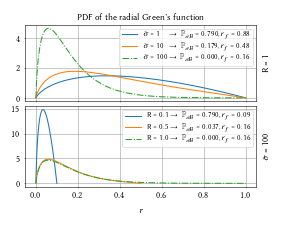

In [11]:
from PDE2D.Sampling import *
from PDE2D import DIM
size1 = 50
size2 = 150

o1_1 = 10
o1_2 = 15
o2_1 = 10
o2_2 = 10
pad = 3
o1 = o1_1 + o1_2
o2 = o2_1 + o2_2
lx = 2 * size1 + o1 + pad
ly = size2 + o2
scale = column_width / ly
fig = plt.figure(figsize = (ly * scale, lx * scale))
g = gridspec.GridSpec(lx, ly, wspace = 0, hspace= 0)
ax = fig.add_subplot(g[:,:])
disable_ticks(ax)
plt.setp(ax.spines.values(), color=frame_color)
ax1 = fig.add_subplot(g[o1_1: o1_1 + size1, o2_1: - o2_2])
ax2 = fig.add_subplot(g[pad + o1_1 + size1: pad + lx -o1_2, o2_1: -o2_2])
green = GreensFunctionAnalytic(dim = DIM.Two)
# First we apply a single radius r = 1
R = 1
x = dr.arange(Float, 1001) / 1000 * R
x_np = x.numpy()
sigma1 = 100
z1 = R * dr.sqrt(sigma1)
sigma2 = 10
z2 = R * dr.sqrt(sigma2)
sigma3 = 1
z3 = R * dr.sqrt(sigma3)

g1,_,norm1 = green.eval_pdf(x, R, sigma1)
pb1 = 1 - sigma1 * norm1
g2,_,norm2 = green.eval_pdf(x, R, sigma2)
pb2 = 1 - sigma2 * norm2
g3,_,norm3 = green.eval_pdf(x, R, sigma3)
pb3 = 1 - sigma3 * norm3

prob_b = r"$\mathbb{P}_{\partial B}$"
arrow = r"$\rightarrow{}$"
space = " "

empty = r"$\text{ }$"
ax1.plot(x_np, g3.numpy(), label = f"{majorant} =   {sigma3} {empty} {empty} {arrow} {prob_b} = {1 - sigma3 * norm3[0]:.3f}, $r_f$ = {data_holder1.get_mean_free_path(R, sigma3)[0]:.2f}")
ax1.plot(x_np, g2.numpy(), label = f"{majorant} = {sigma2} {empty} {arrow} {prob_b} = {1 - sigma2 * norm2[0]:.3f}, $r_f$ = {data_holder1.get_mean_free_path(R, sigma2)[0]:.2f}")
ax1.plot(x_np, g1.numpy(), label = f"{majorant} = {sigma1} {arrow} {prob_b} = {1 - sigma1 * norm1[0] + 1e-4 :.3f}, $r_f$ = {data_holder1.get_mean_free_path(R, sigma1)[0]:.2f}", ls ="-.")


ax1.set_ylabel(f"R = {R}")
ax1.grid()
ax1.legend(fontsize = DEFAULT_FONTSIZE_SMALL -1)


sigma = 100
R1 = 1
R2 = 0.5
R3 = 0.1
x1 = dr.arange(Float, 1001) / 1000 * R1
x2 = dr.arange(Float, 1001) / 1000 * R2
x3 = dr.arange(Float, 1001) / 1000 * R3
x_np1 = x1.numpy()
x_np2 = x2.numpy()
x_np3 = x3.numpy()

g1,_,norm1 = green.eval_pdf(x1, R1, sigma)
pb1 = 1 - sigma1 * norm1
g2,_,norm2 = green.eval_pdf(x2, R2, sigma)
pb2 = 1 - sigma2 * norm2
g3,_,norm3 = green.eval_pdf(x3, R3, sigma)
pb3 = 1 - sigma3 * norm3

ax2.plot(x_np3, g3.numpy(), label = f"R = {R3} {arrow} {prob_b} = {1 - sigma * norm3[0]:.3f}, $r_f$ = {data_holder1.get_mean_free_path(R3, sigma)[0]:.2f}")
ax2.plot(x_np2, g2.numpy(), label = f"R = {R2} {arrow} {prob_b} = {1 - sigma * norm2[0]:.3f}, $r_f$ = {data_holder1.get_mean_free_path(R2, sigma)[0]:.2f}")
ax2.plot(x_np1, g1.numpy(), label = f"R = {R1:.1f} {arrow} {prob_b} = {1 - sigma * norm1[0] + 1e-4 :.3f}, $r_f$ = {data_holder1.get_mean_free_path(R1, sigma)[0]:.2f}", ls = "-.")


ax2.set_ylabel(f"{majorant} = {sigma}")
ax2.grid()
ax2.legend(fontsize = DEFAULT_FONTSIZE_SMALL-1)

ax1.yaxis.set_label_position("right")
ax2.yaxis.set_label_position("right")
#ax1.set_title(r"PDF of the radial Green's function ($G_r^{\bar{\sigma}} (r) / |G^{\bar{\sigma}}| $)")
ax1.set_title(r"PDF of the radial Green's function", pad = 3, fontsize = DEFAULT_FONTSIZE_SMALL)
ax2.set_xlabel(r"$r$")
ax1.xaxis.set_ticklabels([])
save_fig("green", os.path.join(PATH, "figures"))
#plt.savefig("green.pdf", bbox_inches='tight', pad_inches=0.04, dpi=300)

In [12]:
from PDE2D import GreenSampling, Split
from PDE2D.Solver import WosVariable


In [13]:
spp= 1024
resolution = [128, 128]
split_depth = 255
green = GreenSampling.Analytic
split = Split.Naive
points = create_image_points(bbox, resolution, spp=spp)
conf = dr.opaque(UInt32, 3, shape = (1))
max_z = 1000

In [14]:
import time
data_holder_global1 = DataHolder(shape = shape, α = diffusion1)
data_holder_global2 = DataHolder(shape = shape, α = diffusion2)
wos1_global = WosVariable(data_holder_global1, max_z = max_z, green_sampling = green, use_accelaration=False)
wos1 = WosVariable(data_holder1, max_z = 4, green_sampling = green, use_accelaration=True)
wos2_global = WosVariable(data_holder_global2, max_z = max_z, green_sampling = green, use_accelaration=False)
wos2 = WosVariable(data_holder2, max_z = 4, green_sampling = green, use_accelaration=True)

In [15]:
dr.sync_thread()
t1 = time.time()
L1, p1 = wos1.solve(points, max_depth_split=split_depth, split = split, conf_numbers=[conf])
image1, _ , image1_variance, _ = create_image_from_result(L1, resolution, compute_std = True)
dr.sync_thread()
t2 = time.time()
print(t2 - t1)

3.6849207878112793


In [16]:
dr.sync_thread()
t1 = time.time()
L1_global, p1_global = wos1_global.solve(points, max_depth_split=split_depth, split = split, conf_numbers=[conf])
image1_global, _ , image1_variance_global, _ = create_image_from_result(L1_global, resolution, compute_std = True)
dr.sync_thread()
t2 = time.time()
print(t2 - t1)

14.265215873718262


In [17]:
dr.sync_thread()
t1 = time.time()
L2, p2 = wos2.solve(points, max_depth_split=split_depth, split = split, conf_numbers=[conf])
image2, _ , image2_variance, _ = create_image_from_result(L2, resolution, compute_std = True)
dr.sync_thread()
t2 = time.time()
print(t2 - t1)

14.659106254577637


In [18]:
dr.sync_thread()
t1 = time.time()
L2_global, p2_global = wos2_global.solve(points, max_depth_split=split_depth, split = split, conf_numbers=[conf])
image2_global, _ , image2_variance_global, _ = create_image_from_result(L2_global, resolution, compute_std = True)
dr.sync_thread()
t2 = time.time()
print(t2 - t1)

14.005285739898682


In [19]:
path_length1 = p1.path_length.numpy()
path_length1_global = p1_global.path_length.numpy()
path_length2 = p2.path_length.numpy()
path_length2_global = p2_global.path_length.numpy()

In [20]:
print(path_length1.sum())
print(path_length1_global.sum())

213990010
732382482


GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.


'/home/ekrem/repos/MC-PDE3D/figures/path_length/path_length.pdf'

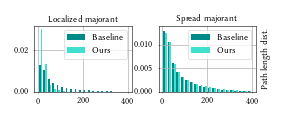

In [21]:
from matplotlib import gridspec
size_x = 80
size_y = 55
pad = 22

o1_1 = 13
o1_2 = 10
o2_1 = 20
o2_2 = 13
o1 = o1_1 + o1_2
o2 = o2_1 + o2_2
lx =  size_y + o1
ly = 2 * size_x + o2 + pad
scale = COLUMN_WIDTH / ly
fig = plt.figure(figsize = (column_width, lx * scale))

g = gridspec.GridSpec(lx, ly)
ax = fig.add_subplot(g[:,:])
plt.setp(ax.spines.values(), color=frame_color)
disable_ticks(ax)
ax1= fig.add_subplot(g[o1_1: -o1_2, o2_1 : o2_1 + size_x])
ax2 = fig.add_subplot(g[o1_1: -o1_2, o2_1 + size_x + pad: -o2_2])
ax1.hist([path_length1_global, path_length1], bins = 20, range = [1,400], color = ["darkcyan", "turquoise"], density = True, label = ["Baseline", "Ours"]);
ax2.hist([path_length2_global, path_length2], bins = 20, range = [1,400], color = ["darkcyan", "turquoise"], density = True, label = ["Baseline", "Ours"]);
#ax1.set_title("Path length distribution")
ax2.set_ylabel(f"Path length dist.")
pad = 3
ax1.set_title(f"Localized majorant", fontsize = DEFAULT_FONTSIZE_SMALL, pad = pad)
ax2.set_title(f"Spread majorant", fontsize = DEFAULT_FONTSIZE_SMALL, pad = pad)
ax1.yaxis.set_label_position("right")
ax2.yaxis.set_label_position("right")
#ax2.set_yticklabels([])
ax1.set_ylim([0,0.032])
ax2.set_ylim([0,0.014])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()
save_fig("path_length", os.path.join(PATH, "figures"))
#plt.savefig("path_length.pdf", bbox_inches='tight', pad_inches=0.004, dpi=300)

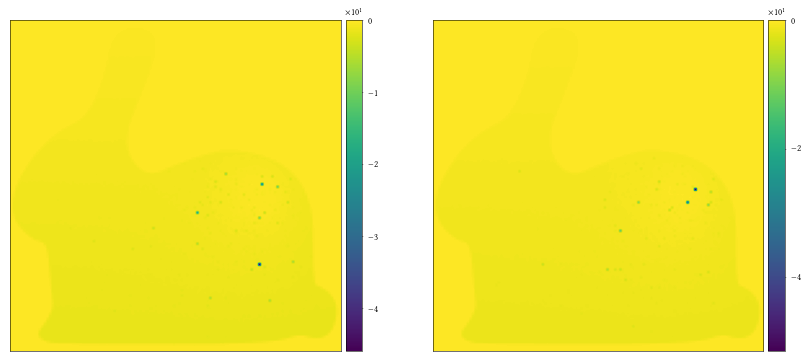

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
plot_image(image1[0], ax1)
plot_image(image1_global[0], ax2)

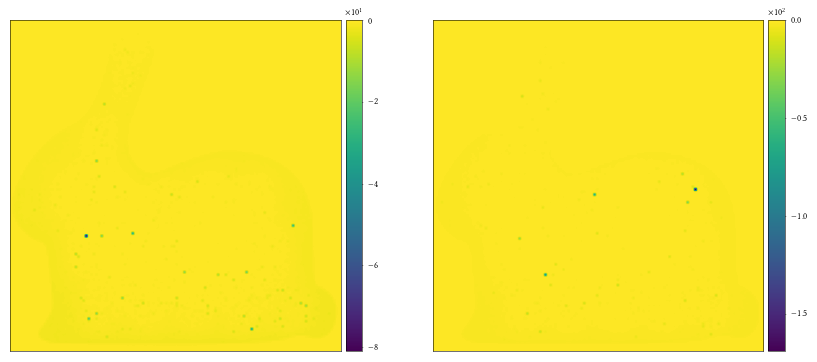

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
plot_image(image2[0], ax1)
plot_image(image2_global[0], ax2)

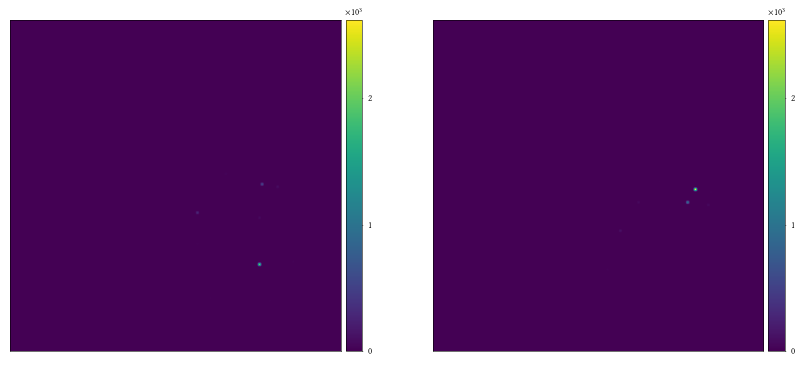

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
max_range = max(np.max(image1_variance), np.max(image1_variance_global))
plot_image(image1_variance[0], ax1, input_range = [0, max_range])
plot_image(image1_variance_global[0], ax2, input_range = [0, max_range])

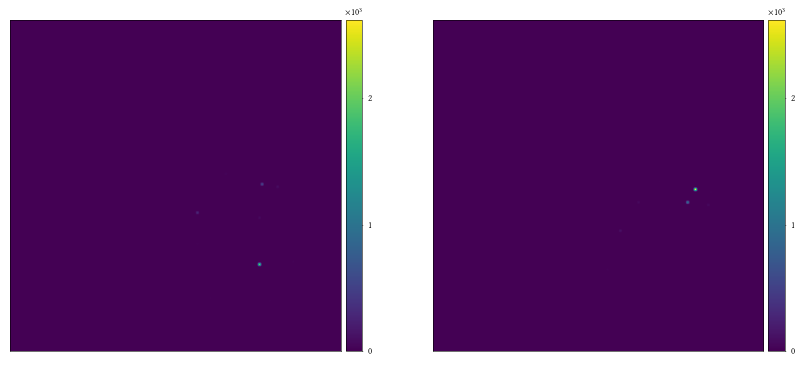

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
max_range = max(np.max(image1_variance), np.max(image1_variance_global))
plot_image(image1_variance[0], ax1, input_range = [0, max_range])
plot_image(image1_variance_global[0], ax2, input_range = [0, max_range])

In [26]:
print(image1_variance.sum())
print(image1_variance_global.sum())

3144.8674
3924.2488


In [ ]:
print(image2_variance.sum())
print(image2_variance_global.sum())

11660.42
41688.48
